# Coordinates for Polyhedra


####  This page explains how the coordinates for objects of type `Polytope<Coord>` in application `polytope` work.

Each polyhedron can be written as the Minkowski sum of a convex polytope (spanned by points $a, b, c,...$) and a cone (generated by the rays $r, s, t,...$). If the polyhedron is bounded, i.e. it is a polytope, then the cone is empty.

Suppose our polyhedron lives in a $d$-space $V$.

In order to obtain a unified view on the polytope and the cone section of a polyhedron, we embed $V$ as an affine subspace of a $(d+1)$-space $W$ such that the image of $V$ contains the point $(1,0,0,...,0)$ and it is parallel to the subspace spanned by the last $d$ unit vectors.

Points from both sections can now be identified with infinite rays through the origin in $W$. Facets are identified with the a hyperplane containing the image of the facet in $V$ and the origin in $W$. This hyperplane is represented by a normal vector.

Note that a facet defining hyperplane is not uniquely determined if the polyhedron is not full-dimensional. 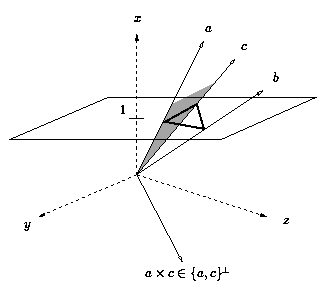

A vertex is incident with a facet if and only if the scalar product of their representatives in $W$ is zero.


The polytope point $a=(ay,az)$ is modelled as the infinite ray from the origin $(0,0,0)$ through the point $(1,ay,az)$, i.e. the set of all non-negative multiples of $(1,ay,az)$. The cone point $r=(ry,rz)$ becomes the ray through $(0,ry,rz)$.

The facet containing the points $a$ and $c$ is represented by an (oriented) normal vector of the (hyper-)plane spanned by $a$, $c$, and the origin. If $d=2$, as in the picture, the normal vector can be computed as the cross product of $a$ and $c$. The normal vector will be oriented such that it points towards the interior of the polyhedron.

According to this model two points in $W$ are identical to polymake if they differ by a positive multiple. In particular, for a polytope point in the input data it is not required that the first coordinate is *1*; it just has to be some positive number.

Notice, that *by definition* the combinatorics (encoded as `VERTICES_IN_FACETS`) of an arbitrary polyhedron is the combinatorics of a polytope which is projectively equivalent to quotient of the orginal polyhedron modulo its lineality space.

## An example

The following defines the positive orthant in 3-space.  It has only one vertex, the origin, and three rays pointing into the three coordinate directions.  The distinction between these comes from our choice of the homogenizing coordinate.

In [1]:
$p=new Polytope(POINTS=>[[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]);



This lists the facet coordinates.

    


In [2]:
print $p->FACETS;

0 1 0 0
0 0 1 0
0 0 0 1
1 0 0 0


Click here for additional output 
 
polymake: used package ppl
 The Parma Polyhedra Library ([[wiki:external_software#PPL]]): A C++ library for convex polyhedra
 and other numerical abstractions.
 http://www.cs.unipr.it/ppl/


Each line describes one linear inequality.  The encoding is as follows: $(a_0,a_1,...,a_d)$ is the inequality $a_0 + a_1 x_1 + ... + a_d x_d \ge 0$.  This way a point in (oriented) homogeneous coordinates satisfies an inequality if and only if the scalar product of the point with the inequality gives a non-negative value. (Use the command `print_constraints($m)` to display the inequalities of the matrix `$m` in a nice way.)

Clearly, the polyhedron is unbounded.

    


In [3]:
print $p->BOUNDED;

false


Yet, the combinatorial data describe a 3-simplex.

    


In [4]:
print $p->VERTICES_IN_FACETS;

{0 2 3}
{0 1 3}
{0 1 2}
{1 2 3}



The rays span the *face at infinity*.

    


In [5]:
print $p->FAR_FACE;          

{1 2 3}


By the way, unbounded polyhedra can be visualized just like bounded ones.  `polymake` automatically chooses a bounding box.

    


In [7]:
$p->VISUAL;

<!--
polymake for lorenz
Mon Aug 26 14:34:02 2019
p_bounded
-->


 
 
 p_bounded 
 
 

 

 
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 

 


 
 Display 
 
 
 Labels 
 
 


 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->


## Internal treatment of polytope generators

As described above polyhedra in `polymake` are modelled as the intersection of a cone with the affine hyperplane defined by $x_0=1$. Hence, infinitely many cones give rise to the same polytope. The algorithms in `polymake` usually work with the *homogenized cone* `homog(P)` of a polyhedron. Hence, `polymake` takes care about the correct canonicalization of user input of polytope generators in the following way:

 In order to construct `homog(P)`, the cone defining the polyhedron is intersected with the hyperplane $H_0: x_0=0$. The rays defining the bounded part $(R_b)$ and rays with $x_0=0$ $(R_0)$ are just inherited. To obtain the rest of the generators for the unbounded part, it is necessary to carry out a "dual Fourier-Motzkin procedure": Any two rays with different signs are linearly combined to a new ray that is contained in $H_0$. All these rays together with the rays in $R_b$ and $R_0$ then define the *homogenized cone* `homog(P)`. 

## Other coefficients

polymake has limited support for other ordered fields for coefficients of polytopes (and linear programs).  An example are quadratic extensions to the rationals.  As an example we show how to construct a regular triangle.


In [8]:
$t=new QuadraticExtension(0,1/2,3);

This gives the number $ \sqrt{3}/2 $.  More generally, you can construct the value $ a+b\sqrt{r} $ via `QuadraticExtension(a, b, r)`.  Note that currently polymake is restricted to computing with single extensions, i.e., you cannot mix distinct square roots.

In [9]:
print $t*$t;

3/4

In [10]:
$triangle = new Polytope<QuadraticExtension>(POINTS=>[[1,0,1],[1,$t,-1/2],[1,-$t,-1/2]]);

That regular triangle can be treated like any polytope. The following computes the area, which results in $ \frac{3}{4}\sqrt{3} $.

In [11]:
print $triangle->VOLUME;

0+3/4r3